In [15]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import SimpleITK as sitk
import skimage

from os.path import expanduser
import glob

from matplotlib.ticker import MaxNLocator

In [16]:
print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SITK version:", sitk.__version__)
print("Scikit-image version:", skimage.__version__)

Python version: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
Numpy version: 1.26.2
Matplotlib version: 3.8.2
SITK version: 2.3.1
Scikit-image version: 0.22.0


### load the MHA

In [17]:
INPUT_DIR = '/home/daryl'

image_01 = sitk.GetArrayFromImage(sitk.ReadImage('{}/phase-01.mha'.format(INPUT_DIR)))
image_02 = sitk.GetArrayFromImage(sitk.ReadImage('{}/phase-02.mha'.format(INPUT_DIR)))
mask = sitk.GetArrayFromImage(sitk.ReadImage('{}/mask.mha'.format(INPUT_DIR)))

jacobian_det = sitk.GetArrayFromImage(sitk.ReadImage('{}/vf_jac.mha'.format(INPUT_DIR)))
ventilation = (jacobian_det-1.0) * mask

In [18]:
print(image_01.shape, image_02.shape, mask.shape)

(250, 304, 304) (250, 304, 304) (250, 304, 304)


In [19]:
from skimage import exposure

normalised_ventilation = exposure.rescale_intensity(ventilation, in_range='image', out_range=(1e-3,1.))

In [20]:
np.max(normalised_ventilation)

1.0

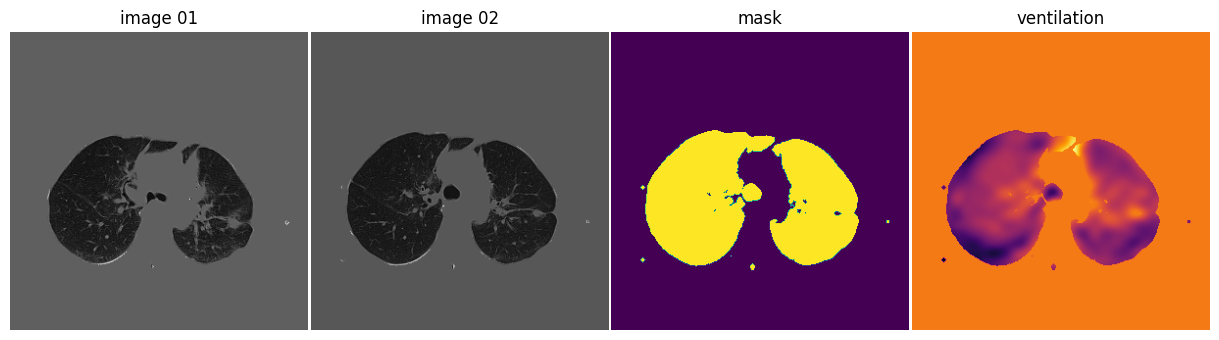

In [21]:
DISPLAY_IDX = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))
ax1.imshow(image_01[DISPLAY_IDX], cmap="gray")
ax1.set_title('image 01')
ax1.set_axis_off()

ax2.imshow(image_02[DISPLAY_IDX], cmap="gray")
ax2.set_title('image 02')
ax2.set_axis_off()

ax3.imshow(mask[DISPLAY_IDX])
ax3.set_title('mask')
ax3.set_axis_off()

ax4.imshow(normalised_ventilation[DISPLAY_IDX], cmap="inferno")
ax4.set_title('ventilation')
ax4.set_axis_off()

# fig.suptitle('Patient ID {}'.format(patient_id), x=0.1, y=1.0, fontsize=12, ha='left')

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.01, 
                    hspace=0.1)

In [24]:
normalised_ventilation[DISPLAY_IDX][0,0]

0.6748959